# Iris Flower Classification

## Imports

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [31]:
%matplotlib inline

## Loads and Processes

In [32]:
data = pd.read_csv('data//Iris.csv', index_col='Id')

In [33]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df = data.copy()

In [35]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [37]:
# Reduce memory usage
df[df.select_dtypes('float64').columns] = df.select_dtypes('float64').astype('float16')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float16
 1   SepalWidthCm   150 non-null    float16
 2   PetalLengthCm  150 non-null    float16
 3   PetalWidthCm   150 non-null    float16
 4   Species        150 non-null    object 
dtypes: float16(4), object(1)
memory usage: 3.5+ KB


In [39]:
df.Species = df.Species.apply(lambda s: s.split('-')[-1])

In [40]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.101562,3.500000,1.400391,0.199951,setosa
2,4.898438,3.000000,1.400391,0.199951,setosa
3,4.699219,3.199219,1.299805,0.199951,setosa
4,4.601562,3.099609,1.500000,0.199951,setosa
5,5.000000,3.599609,1.400391,0.199951,setosa


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float16
 1   SepalWidthCm   150 non-null    float16
 2   PetalLengthCm  150 non-null    float16
 3   PetalWidthCm   150 non-null    float16
 4   Species        150 non-null    object 
dtypes: float16(4), object(1)
memory usage: 3.5+ KB


In [42]:
df.columns = ['SL', 'SW', 'PL', 'PW', 'species']

In [43]:
df.head()

,SL,SW,PL,PW,species
Id,,,,,
1,5.101562,3.500000,1.400391,0.199951,setosa
2,4.898438,3.000000,1.400391,0.199951,setosa
3,4.699219,3.199219,1.299805,0.199951,setosa
4,4.601562,3.099609,1.500000,0.199951,setosa
5,5.000000,3.599609,1.400391,0.199951,setosa


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float16
 1   SW       150 non-null    float16
 2   PL       150 non-null    float16
 3   PW       150 non-null    float16
 4   species  150 non-null    object 
dtypes: float16(4), object(1)
memory usage: 3.5+ KB


## EDA - Exploratory Data Analysis

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843750,0.828125,4.300781,5.101562,5.800781,6.398438,7.898438
SW,150.0,3.052734,0.433594,2.000000,2.800781,3.000000,3.300781,4.398438
PL,150.0,3.759766,1.764648,1.000000,1.599609,4.349609,5.101562,6.898438
PW,150.0,1.198242,0.763184,0.099976,0.300049,1.299805,1.799805,2.500000


In [46]:
df.groupby(by='species').mean()

,SL,SW,PL,PW
species,,,,
setosa,5.006016,3.418008,1.464043,0.243965
versicolor,5.936094,2.770039,4.260000,1.325977
virginica,6.587734,2.974023,5.552266,2.026055


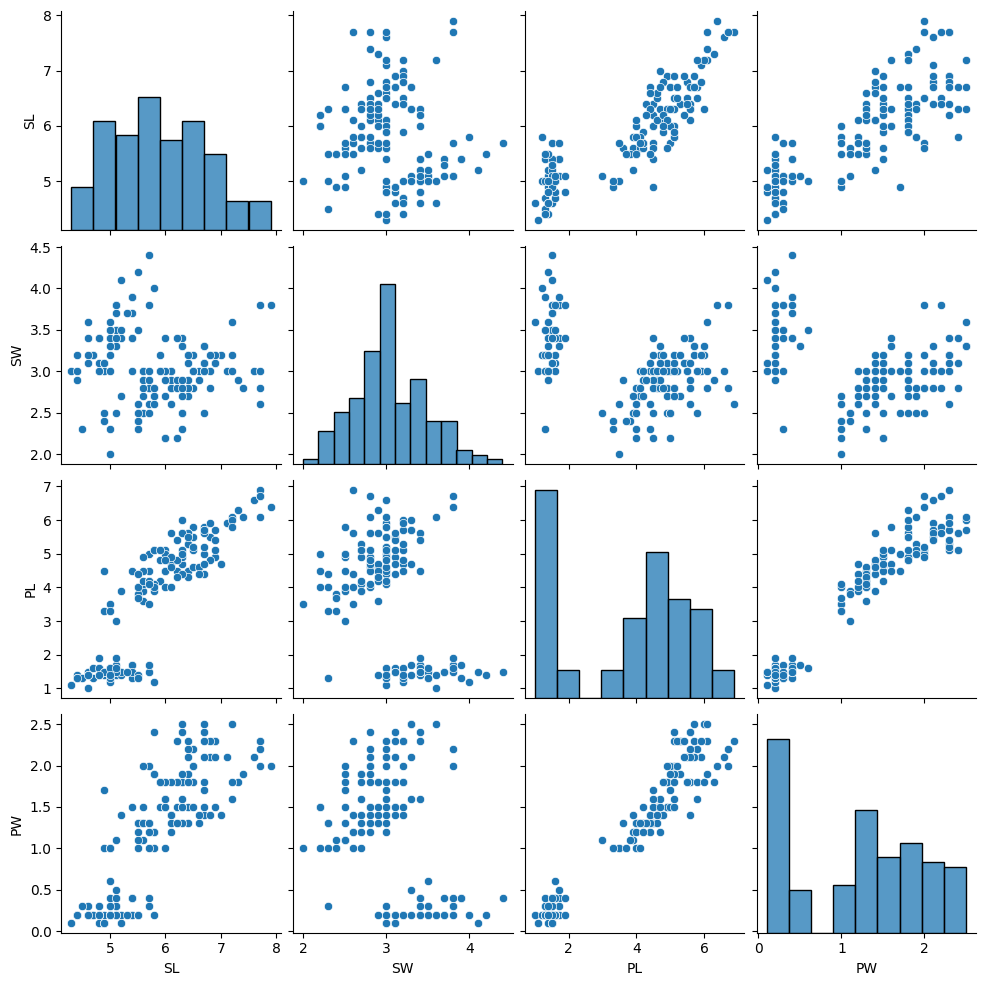

In [47]:
sns.pairplot(df)

<AxesSubplot: >

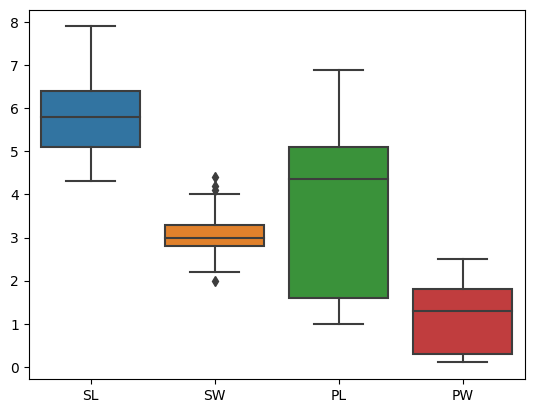

In [48]:
sns.boxplot(data=df)

## Tranformation

In [49]:
encoder = LabelEncoder()
df.species = encoder.fit_transform(df.species)

In [50]:
df.head()

,SL,SW,PL,PW,species
Id,,,,,
1,5.101562,3.500000,1.400391,0.199951,0
2,4.898438,3.000000,1.400391,0.199951,0
3,4.699219,3.199219,1.299805,0.199951,0
4,4.601562,3.099609,1.500000,0.199951,0
5,5.000000,3.599609,1.400391,0.199951,0


## Data Split

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(
    df.drop(columns=['species']), df.species, random_state=33, test_size=0.2
)